--esta parte não foi concluida nem implemantada--

objetivo:
	nódulos cuja média das opiniões é 5 ou de 1, são os nódulos onde a informação pode ser considerada mais fidedigna(assumindo que existem mais que uma anotação), como tal aparecem em menor quantidade(especialmente os de 5)
	uma forma alternativa proposta para aumentar a quantidade de samples desses nós seria, não só usar a mascara obtida através da junção das várias opiniões mas usar também a de cada uma como se fossem nódulos diferentes



In [ ]:
'''
BIBLIOTECAS
'''

import pylidc as pl
from pylidc.utils import consensus
import matplotlib.pyplot as plt
import matplotlib.animation as manim
import numpy as np
from utils import get_nodule_class, filename_from_annotation, cluster_annots
import os
from skimage.measure import find_contours
from skimage.draw import polygon2mask



Loading dicom files ... This may take a moment.


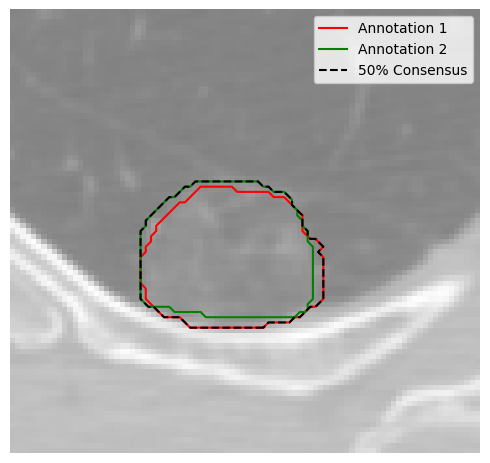

In [ ]:
''' 
código copiado de https://pylidc.github.io/tuts/consensus.html
'''


# Query for a scan, and convert it to an array volume.
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0002').first()
vol = scan.to_volume()

# Cluster the annotations for the scan, and grab one.
nods = scan.cluster_annotations()
anns = nods[0]

# Perform a consensus consolidation and 50% agreement level.
# We pad the slices to add context for viewing.
cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

# Get the central slice of the computed bounding box.
k = int(0.5*(cbbox[2].stop - cbbox[2].start))

# Set up the plot.
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

# Plot the annotation contours for the kth slice.
colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
        label = "Annotation %d" % (j+1)
        plt.plot(c[:,1], c[:,0], colors[j], label=label)

# Plot the 50% consensus contour for the kth slice.
for c in find_contours(cmask[:,:,k].astype(float), 0.5):
    plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

ax.axis('off')
ax.legend()
plt.tight_layout()
#plt.savefig("../images/consensus.png", bbox_inches="tight")
plt.show()

Loading dicom files ... This may take a moment.
Annotation(id=88,scan_id=13)


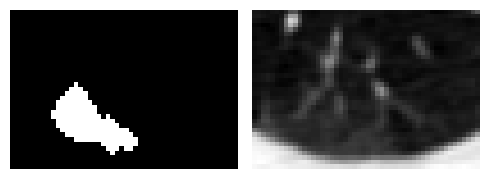

Loading dicom files ... This may take a moment.
Annotation(id=89,scan_id=13)


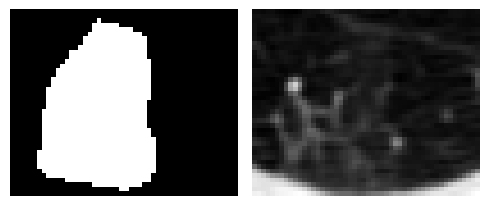

' \n\nann = pl.query(pl.Annotation).first()\nvol = ann.scan.to_volume()\n\npadding = [(30,10), (10,25), (0,0)]\n\nmask = ann.boolean_mask(pad=padding)\nbbox = ann.bbox(pad=padding)\n\nfig,ax = plt.subplots(1,2,figsize=(5,3))\n\nax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)\nax[0].axis(\'off\')\n\nax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)\nax[1].axis(\'off\')\n\nplt.tight_layout()\n#plt.savefig("../images/mask_bbox.png", bbox_inches="tight")\nplt.show()\n\n'

In [ ]:
''' 
sendo que as mascaras obtidas são completamente diferentes das mostradas na imagem em cima, este método está errado
o loop está a ser feito pelos nódulos, cada img pertence a um nódulo diferente
'''

# Step 1: Query the scan for patient LIDC-IDRI-0001
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0002').first()

# Step 2: Get nodules in this scan
nodules = scan.cluster_annotations()

# Step 3: Select the first nodule
nodule = nodules[0]

# Step 4: Generate masks for each annotation (radiologist)
for i, annotation in enumerate(nodule):

    vol = annotation.scan.to_volume()

    #padding = [(30,10), (10,25), (0,0)]
    print(annotation)
    mask = annotation.boolean_mask()#pad=padding
    bbox = annotation.bbox()#pad=padding
        
    fig,ax = plt.subplots(1,2,figsize=(5,3))


    
    img = vol[bbox]
    
    #img[~mask] = -1
    ax[0].imshow(mask[:,:,2], cmap=plt.cm.gray)
    ax[0].axis('off')
    
    ax[1].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
    ax[1].axis('off')

    

    plt.tight_layout()
    #plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
    plt.show()

    '''
    # Generate the binary mask for the specific annotation
    vol, bbox = annotation.uniform_cubic_resample()
    
    # Step 5: Visualize the middle slice of the mask
    plt.figure()
    plt.imshow(vol[:, :, vol.shape[2] // 2], cmap='gray')
    plt.title(f"Nodule Mask for Annotation {i + 1} (Radiologist {i + 1})")
    plt.show()
    '''
    

##########################################

''' 

ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

padding = [(30,10), (10,25), (0,0)]

mask = ann.boolean_mask(pad=padding)
bbox = ann.bbox(pad=padding)

fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
#plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
plt.show()

'''

Loading dicom files ... This may take a moment.


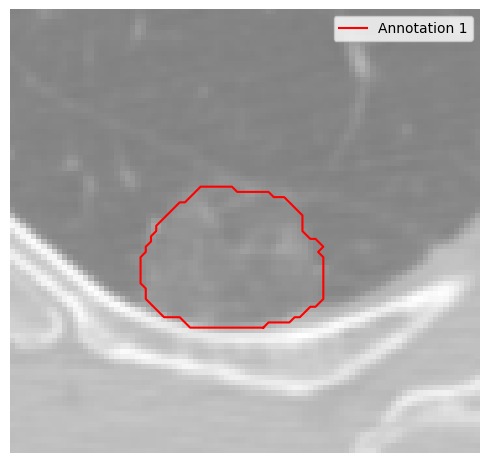

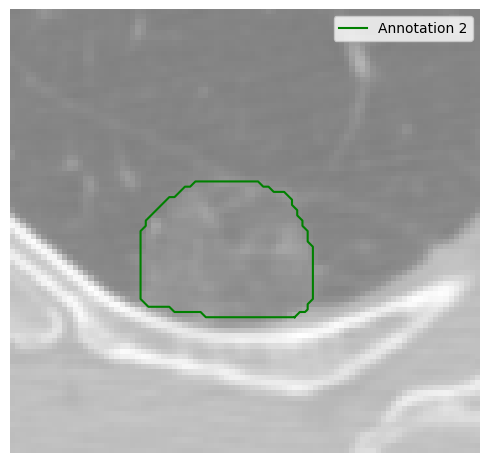

In [ ]:
''' 
pequena alteração ao código base copiado
objetivo, conseguir separar os contornos de cada anotação
'''

# Query for a scan, and convert it to an array volume.
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0002').first()
vol = scan.to_volume()

# Cluster the annotations for the scan, and grab one.
nods = scan.cluster_annotations()
anns = nods[0]

# Perform a consensus consolidation and 50% agreement level.
# We pad the slices to add context for viewing.
cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

# Get the central slice of the computed bounding box.
k = int(0.5*(cbbox[2].stop - cbbox[2].start))



# Plot the annotation contours for the kth slice.
colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    # Set up the plot.
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)
    
    #for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
    c = find_contours(masks[j][:,:,k].astype(float), 0.5)[0]  # -> em vez de loop
    label = "Annotation %d" % (j+1)
    plt.plot(c[:,1], c[:,0], colors[j], label=label)


    ax.axis('off')
    ax.legend()
    plt.tight_layout()
    #plt.savefig("../images/consensus.png", bbox_inches="tight")
    plt.show()

In [ ]:
'''
Attempt turnung above innto 3D boolean mask
não existe o equivalente a polygon2mask em 3D,
alternativa, para cada z em cbbox[2].shape criar uma maskara 2D, guardálas todas numa contour_mask
'''


# Query for a scan, and convert it to an array volume.
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0002').first()
vol = scan.to_volume()

# Cluster the annotations for the scan, and grab one.
nods = scan.cluster_annotations()
anns = nods[0]

# Perform a consensus consolidation and 50% agreement level.
# We pad the slices to add context for viewing.
cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

# Get the central slice of the computed bounding box.
#k = int(0.5*(cbbox[2].stop - cbbox[2].start))
#print(int(0.5*(cbbox[2].stop - cbbox[2].start)))


# Plot the annotation contours for the kth slice.
#colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):

    # Initialize it with the same shape as the volume.
    contour_masks = np.zeros(vol.shape, dtype=bool)
    print(cbbox[2].start, cbbox[2].stop)
    

    for k in range(cbbox[2].stop - cbbox[2].start):
        
        c = find_contours(masks[j][:,:,k].astype(float), 0.5)[0]

        ###USE POLYGON2MASK(IMG_SHAPE, POLYGON)
        # Create a boolean mask for each contour
        single_contour_mask = polygon2mask((vol.shape[0], vol.shape[1]), c)
    
    
        # Place the contour mask into the 3D volume storage
        contour_masks[vol.shape[0], vol.shape[1], k] = np.logical_or(contour_masks[vol.shape[0], vol.shape[1], k], single_contour_mask)
        print(":)")




    k = int(0.5*(cbbox[2].stop - cbbox[2].start))
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(contour_masks[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5) #contour_masks

    ax.axis('off')
    ax.legend()
    plt.tight_layout()
    #plt.savefig("../images/consensus.png", bbox_inches="tight")
    plt.show()

Loading dicom files ... This may take a moment.
171 199


IndexError: index 512 is out of bounds for axis 0 with size 512

Loading dicom files ... This may take a moment.
type c: <class 'numpy.ndarray'>


C:\Users\Daniela\AppData\Local\Temp\ipykernel_7824\2274506235.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


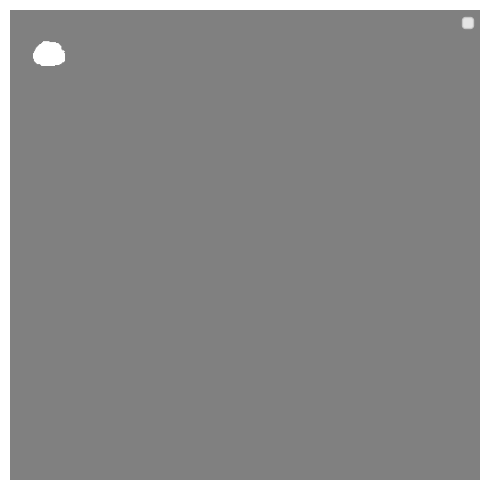

type c: <class 'numpy.ndarray'>


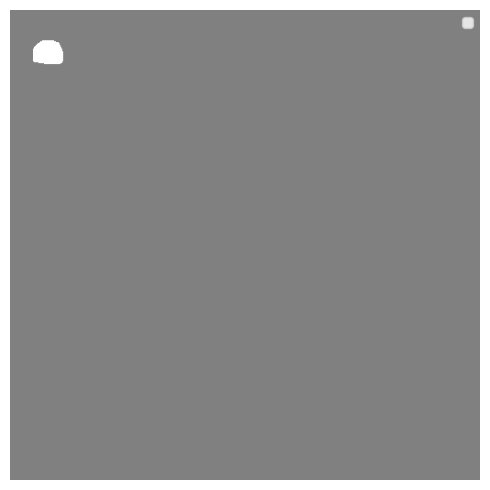

In [ ]:
'''
sendo que não foi encontrada nenhuma função em pylidc, 
usando a função polygon2mask criar uma máscara 2D para a camada em questão
'''


# Query for a scan, and convert it to an array volume.
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0002').first()
vol = scan.to_volume()

# Cluster the annotations for the scan, and grab one.
nods = scan.cluster_annotations()
anns = nods[0]

# Perform a consensus consolidation and 50% agreement level.
# We pad the slices to add context for viewing.
cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

# Get the central slice of the computed bounding box.
k = int(0.5*(cbbox[2].stop - cbbox[2].start))



# Plot the annotation contours for the kth slice.
colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    # Set up the plot.
    
    
    
    c = find_contours(masks[j][:,:,k].astype(float), 0.5)[0]
    #label = "Annotation %d" % (j+1)
    #plt.plot(c[:,1], c[:,0], colors[j], label=label)


    ###USE POLYGON2MASK(IMG_SHAPE, POLYGON)
    print(f'type c: {type(c)}')
    #mask = polygon2mask((vol[0], vol[1]), c)
    # Create a boolean mask for each contour
    single_contour_mask = polygon2mask((vol.shape[0], vol.shape[1]), c)
    # Initialize it with the same shape as the volume.
    contour_masks = np.zeros(vol.shape, dtype=bool)
    
    # Place the contour mask into the 3D volume storage
    #contour_masks[cbbox[0], cbbox[1], k] = np.logical_or(contour_masks[cbbox[0], cbbox[1], k], single_contour_mask)




    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(single_contour_mask, cmap=plt.cm.gray, alpha=0.5) #contour_masks[cbbox][:,:,k]

    ax.axis('off')
    ax.legend()
    plt.tight_layout()
    #plt.savefig("../images/consensus.png", bbox_inches="tight")
    plt.show()

END OF SILLY TEST FASE
---

Processing first nodule in scan LIDC-IDRI-0078...


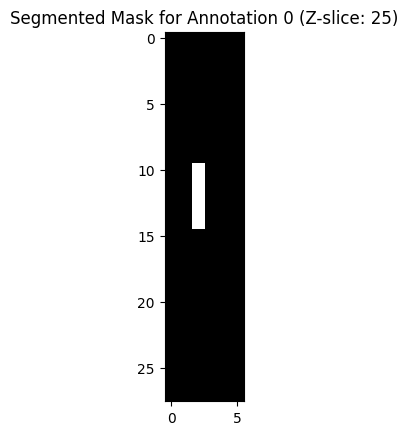

Processed segmented mask for annotation 0 of nodule.


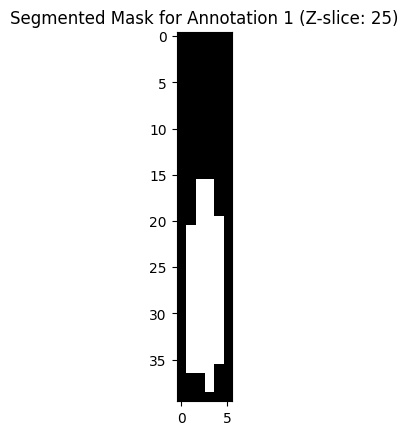

Processed segmented mask for annotation 1 of nodule.


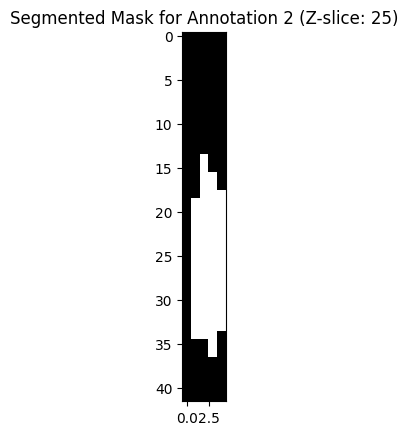

Processed segmented mask for annotation 2 of nodule.


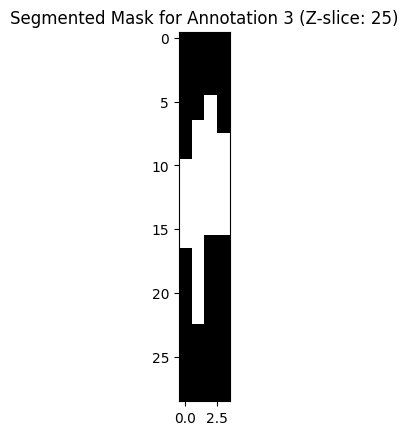

Processed segmented mask for annotation 3 of nodule.
Processing first nodule in scan LIDC-IDRI-0069...


IndexError: index 40 is out of bounds for axis 0 with size 18

In [4]:
import matplotlib.pyplot as plt

# Assume you have already queried the scans and clustered them into nodules
scans = pl.query(pl.Scan).all()

for scan in scans:
    try:
        # Cluster annotations into nodules
        nodules = scan.cluster_annotations(tol=10)
    except ClusterError:
        print(f"ClusterError: Skipping scan {scan.patient_id} due to clustering issue.")
        continue

    # Process the first nodule (for example)
    if nodules:
        first_nodule = nodules[0]
        print(f"Processing first nodule in scan {scan.patient_id}...")

        # Loop through each annotation for the nodule
        for i, ann in enumerate(first_nodule):

            # Get the centroid coordinates (without parentheses)
            centroid = ann.centroid

            # Visualize the mask slice at the centroid position
            vol = annotation.scan.to_volume()


            # Get the 3D segmented mask for this annotation
            mask = annotation.boolean_mask()#pad=padding
            bbox = annotation.bbox()#pad=padding
                
            fig,ax = plt.subplots(1,2,figsize=(5,3))



            img = vol[bbox]
            
            img[~mask] = -1


            # Optionally, save the mask slice as an image
            #plt.imsave(f"segmented_mask_{scan.patient_id}_annotation_{i}.png", segmented_mask[z_slice], cmap='gray')

            print(f"Processed segmented mask for annotation {i} of nodule.")


In [13]:

from pylidc.Scan import ClusterError

highest_annotation_id = 6858
scans = pl.query(pl.Scan).all()

for scan in scans:

    try:
        # Get all nodules for the scan with increased tolerance
        nodules = scan.cluster_annotations(tol=10)  # Increase the tolerance if needed
    except ClusterError:
        print(f"ClusterError: Skipping scan {scan.patient_id} due to clustering issue.")
        continue  # Skip this scan if clustering fails

    
    # Loop over each nodule
    for nodule in nodules:
        # Get the malignancy ratings for all annotations for the nodule
        malignancies = [ann.malignancy for ann in nodule]
        
        # Check if all annotations for this nodule have a malignancy score of 5
        ''' 
        pk tem q ser todos? => faz média de várias opiniões e dá 5
        '''

        #makee sure that all docks think it is bad
        if malignancies.count(5) >= 3 and malignancies.count(4) <= 1: #all(m == 5 for m in malignancies)
            print(f"Nodule in scan {scan.patient_id} with malignancy 5:")
            print(f"Nodule details: {nodule}")

            #to be continued
            ''' 
            criar nodulo n+1 => imagem e mascara da opinião
			acrescentá-la a nn_data\images a imagem e mascara
			n +=1
	        return n

            ask to get the img of each nodule and the mask, give new id as (highest id +1)
            '''

            #untested lacks the save img and mask part
            # Now, create new nodules for each annotation that meets the criteria
            for ann in nodule:
                # Increment the nodule counter to assign unique IDs
                highest_annotation_id += 1
                
                # Here you would treat this annotation as a separate "nodule"
                print(f"New Nodule ID: {highest_annotation_id}")
                print(f"Annotation details: malignancy={ann.malignancy}, "
                      f"center=({ann.centroid()})")
                
                # You can store or process the annotation as a separate "nodule"
                # For example, save or analyze the annotation data here


    

Nodule in scan LIDC-IDRI-0007 with malignancy 5:
Nodule details: [Annotation(id=125,scan_id=18)]
Nodule in scan LIDC-IDRI-0020 with malignancy 5:
Nodule details: [Annotation(id=265,scan_id=31)]
Nodule in scan LIDC-IDRI-0029 with malignancy 5:
Nodule details: [Annotation(id=314,scan_id=40)]
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
ClusterError: Skipping scan LIDC-IDRI-0055 due to clustering issue.
Nodule in scan LIDC-IDRI-0058 with malignancy 5:
Nodule details: [Annotation(id=606,scan_id=69), Annotation(id=609,scan_id=69), Annotation(id=612,scan_id=69)]
Nodule in scan LIDC-IDRI-0060 with malignancy 5:
Nodule details: [Annotation(id=620,scan_id=71), Annotation(id=626,scan_id=71)]
Nodule in scan LIDC-IDRI-0060 with malignancy 5:
Nodule details: [Annotation(id=625,scan_id=71)]
Nodule in scan LIDC-IDRI-0072 with malignancy 5:
Nodule details: [Annotation(id=725,scan_id=82), Annotation(id=726,scan_id=82), Annotation(id=727,scan_i

KeyboardInterrupt: 